In [8]:
## Project Dependencies 
# Anacodna with tensorflow
# pandas 
# praw for scraping reddit posts
# beautifulsup4 for supportgroup
# another web scrping tool is call selenium

import bs4
import pandas as pd
from RedditClientInfo import Login

In [9]:
reddit_client = Login.LoginReddit()
depression_posts = reddit_client.subreddit('Depression').hot(limit=3000)
happy_posts = reddit_client.subreddit('Happy').hot(limit=1000)
suicide_posts = reddit_client.subreddit('SuicideWatch').hot(limit=1000)
anxiety_posts = reddit_client.subreddit('Anxiety').hot(limit=1000)
list_of_subreddit_posts = [happy_posts, suicide_posts, depression_posts, anxiety_posts]

In [10]:
## post.is_self == True mean that is a text base post
happy_text = []
depression_text = []
anxiety_text  = []
suicide_text = []
happy_label  = []
depression_label = []
anxiety_label = []
suicide_label = []
for post in happy_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        happy_text.append(current_post)
        happy_label.append("happy")
for post in suicide_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        suicide_text.append(current_post)
        suicide_label.append("suicidal")
for post in depression_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        depression_text.append(current_post)
        depression_label.append("depression")
for post in anxiety_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        anxiety_text.append(current_post)
        anxiety_label.append("anxiety")

 


In [11]:
happy_text = happy_text[2:]
happy_label = happy_label[2:]

suicide_text = suicide_text[2:]
suicide_label = suicide_label[2:]

depression_text = depression_text[2:]
depression_label = depression_label[2:]

anxiety_text = anxiety_text[2:]
anxiety_label =  anxiety_label[2:]

In [12]:
all_text = happy_text + suicide_text + depression_text + anxiety_text
labels = happy_label + suicide_label + depression_label + anxiety_label

In [13]:
all_posts ={"text": all_text, "label": labels  }

In [14]:
from pandas import DataFrame
df = DataFrame(all_posts,columns= ['text', 'label'])
df.head()

,text,label
0,Today was a good day: I am exactly one month s...,happy
1,Yesterday I was the sickest I've ever felt in ...,happy
2,My brother and his fiancé are having a baby\n\...,happy
3,I’m recovered from depression and are no longe...,happy
4,I got a good deal on some used headphones :)\n...,happy


In [15]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)
sentiment_category= ["postive", "anxiety", "depression", "suicide"]

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [17]:
happy_data_set =  df[df["label"]== "happy"]
anxiety_data_set = df[df["label"]== "anxiety"]
depression_data_set =df[df["label"]== "depression"]
suicide_data_set =df[df["label"]== "suicidal"]
print(suicide_data_set.head())

                                                  text     label
200  I hate how your brain teases you with random m...  suicidal
201  I wish I could give my life away to someone wh...  suicidal
202  whenever i wake up, i realize i’m alive for an...  suicidal
203  the only thing stopping me from killing myself...  suicidal
204  Life really isn't worth living if you're poor\...  suicidal


Today was a good day: I am exactly one month smoke-free, I ran a 10K in under 1 hour for the first time in five years, my thesis was awarded the highest grade and my paper was also just accepted!

It is bizarre and awesome. I can't remember the last time something or let alone so many good things happened. It worked really hard for all of this and it feels so damn good to see it rewarded. I'm freaking ecstatic and I just wanted to share this with someone :D


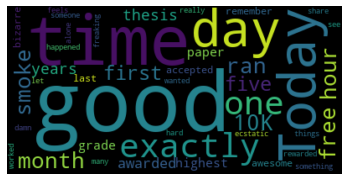

In [18]:
text = happy_data_set['text'][0]
print(text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

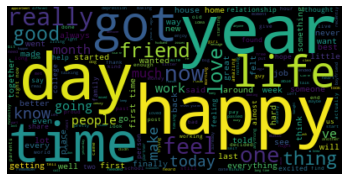

In [19]:
all_words = ''
for happy_text in happy_data_set['text']:
    all_words += happy_text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

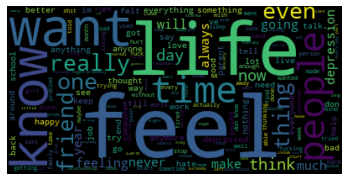

In [20]:
all_words = ''
for text in depression_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

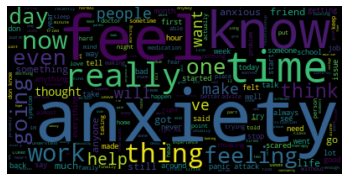

In [21]:
all_words = ''
for text in anxiety_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()   

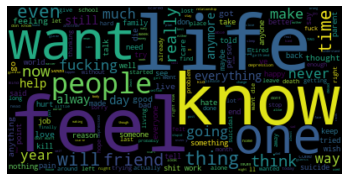

In [22]:
all_words = ''
for text in suicide_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()  

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\nie209\anaconda3\envs\tensorflow_c

In [17]:
print(df[ df['label'] == 'happy'].size)
print(df[ df['label'] == 'depression'].size)
# for idx,row in df.iterrows():
#     row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
print(X)

408
1974
[[   0    0    0 ...    2   23  680]
 [   0    0    0 ...   22  142  116]
 [   0    0    0 ...   75  724   37]
 ...
 [   0    0    0 ...  416   11 1320]
 [   0    0    0 ...    9  341  122]
 [   0    0    0 ...  476   51  231]]


In [18]:
embed_dim = 128
lstm_out = 196

model = keras.Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))

model.add(LSTM(lstm_out))
model.add(Dense(4,activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3126, 128)         256000    
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 4)                 788       
Total params: 511,588
Trainable params: 511,588
Non-trainable params: 0
_________________________________________________________________
None


In [19]:


Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



(2124, 3126) (2124, 4)
(1047, 3126) (1047, 4)


In [ ]:


batch_size = 64
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)



c:\users\nie209\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/7


In [1]:
############# here is where we start scraping data from support group
import requests 


In [2]:
url = "https://depression.supportgroups.com/ajax/sg_f/group_past_activity?max=20&before=1571465444&id=29176"
response = requests.get(url)

In [3]:
print(response)

<Response [200]>


In [6]:
print( response.json())

{'activity_nids': {'653361': 653361, '653354': 653354, '653166': 653166, '651029': 651029, '653179': 653179, '652973': 652973, '653137': 653137, '648676': 648676, '652488': 652488, '633853': 633853, '652279': 652279, '652273': 652273, '652152': 652152, '652158': 652158, '652210': 652210, '650782': 650782, '651134': 651134, '651855': 651855, '652227': 652227, '652594': 652594}, 'themed_output': {'nid_653361': ['<div id=\'activity-item-653361\' nid=\'653361\' time=\'1571465444\'  class=\'activity-item-wrapper\' >\n  <a href=\'https://www.supportgroups.com/depression/not-sure-if-its-depression-but-i-have-been-not-happy-for-a\'>\n\t<!-- user image, name, points, date -->\n\t<div class=\'activity-item-userinfo\'>\n    \t<img src="https://www.supportgroups.com/sites/default/files/styles/50x50/public/pictures/picture-1083565-1571455551.jpg?itok=6wGheaxi" width="50" height="50" alt="Bofo2019&#039;s picture" title="Bofo2019&#039;s picture" />\t    <h5>\n\t\t\t<span id=\'user-profile-container-6

In [7]:
import json

In [12]:
print(json.dumps(response.json(), sort_keys=True, indent=4))

{
    "activity_nids": {
        "633853": 633853,
        "648676": 648676,
        "650782": 650782,
        "651029": 651029,
        "651134": 651134,
        "651855": 651855,
        "652152": 652152,
        "652158": 652158,
        "652210": 652210,
        "652227": 652227,
        "652273": 652273,
        "652279": 652279,
        "652488": 652488,
        "652594": 652594,
        "652973": 652973,
        "653137": 653137,
        "653166": 653166,
        "653179": 653179,
        "653354": 653354,
        "653361": 653361
    },
    "interval": 180,
    "themed_output": {
        "nid_633853": [
            "<div id='activity-item-633853' nid='633853' time='1571355649'  class='activity-item-wrapper' >\n  <a href='https://www.supportgroups.com/depression-personality-disorder-self-esteem/media'>\n\t<!-- user image, name, points, date -->\n\t<div class='activity-item-userinfo'>\n    \t<img src=\"https://www.supportgroups.com/sites/all/themes/skeletonsub/images/plus-SG-50.p